In [2]:
%matplotlib inline  
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# Read in data

In [3]:
df = pd.read_csv('gene_expression.csv')

In [4]:
df = df.drop(df.columns[0], 1)

In [5]:
df.head()

,azc81,bdb223,bsj154,bwr202,drs203,eno150,hgo132,jem139,mbd135,nby169,nfb200,npo218,ofz208,qmj73,rgm35,rva241,wdb83,yfm28
0,0.548211,0.120231,0.055537,0.110432,0.960696,0.759469,0.874050,0.807593,0.663830,0.428409,0.912917,0.940543,0.744947,0.261574,0.783734,0.934044,0.000000,0.737642
1,0.111383,0.353474,0.051218,0.003683,0.939109,0.872921,0.900342,0.886981,0.680817,0.722386,0.793601,0.848213,0.779071,0.243231,0.338945,0.912718,0.000000,0.926540
2,0.459971,0.594186,1.000000,0.946645,0.399635,0.359502,0.342766,0.335695,0.544554,0.689002,0.364604,0.946927,0.886632,0.815887,0.555462,0.405912,0.700435,0.396066
3,0.099305,0.378251,0.591589,0.619087,0.901629,0.984772,0.802375,1.000000,0.270841,0.298178,0.434799,0.395561,0.077296,0.248131,0.274456,0.885201,0.476311,0.932371
4,0.460037,0.387290,0.829306,0.955035,0.464486,0.745253,0.637082,0.816490,0.955152,0.086996,0.751228,0.104130,0.473013,0.645816,0.123011,0.467099,1.000000,0.888156


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1361d9898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x146ae1cc0>]], dtype=object)

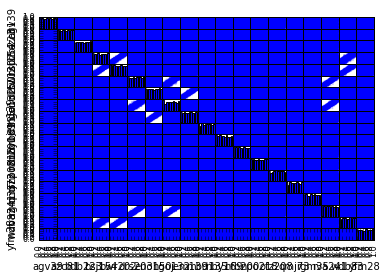

In [12]:
pd.plotting.scatter_matrix(df, alpha = .2)

In [6]:
df.shape

(3000, 18)

# Perform PCA

In [11]:
pca = PCA(n_components=10)
pca.fit(df)

PCA(copy=True, n_components=10, whiten=False)

# Consider how many components are valuable

In [17]:
pca.explained_variance_ratio_

array([ 0.16429194,  0.16212491,  0.10932196,  0.05986414,  0.05837421,
        0.0571921 ,  0.05615894,  0.05561349,  0.05334676,  0.05253835])

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.16429194,  0.32641685,  0.43573881,  0.49560295,  0.55397716,
        0.61116926,  0.66732819,  0.72294168,  0.77628844,  0.82882679])

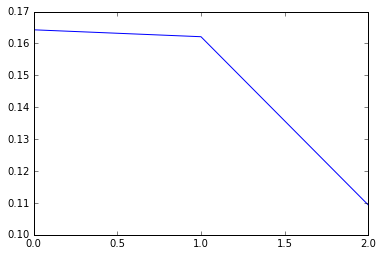

In [28]:
plt.plot(pca.explained_variance_ratio_)

In [23]:
pca = PCA(n_components=3)
pca.fit(df)
df_reduced = pca.transform(df)

In [24]:
df_reduced

array([[-0.45527962, -0.99380172, -0.33448512],
       [-0.41011749, -1.04624331, -0.46277614],
       [-0.01724507,  0.69975824,  0.23988205],
       ..., 
       [ 0.46236777,  0.98090464,  0.38245838],
       [ 0.83008957, -0.02415081,  0.34593279],
       [ 0.44865935, -0.54350938,  0.17678389]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11975bac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119be5828>]], dtype=object)

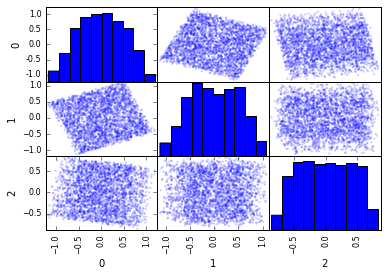

In [25]:
df_reduced = pd.DataFrame(df_reduced)
pd.plotting.scatter_matrix(df_reduced, alpha = .2)

# Some info from PCA return

In [30]:
pca.components_.shape

(3, 18)

In [32]:
pca.components_[0]

array([-0.02278525,  0.01385518, -0.22211618, -0.21439913, -0.53339307,
       -0.08633617, -0.52950481, -0.09239547,  0.01514178,  0.03776326,
       -0.00475252, -0.00388681,  0.01703806,  0.0269922 , -0.01032532,
       -0.52470639, -0.21206133, -0.00256597])

In [36]:
np.argmax(np.abs(pca.components_[0]))

4

In [37]:
pca.components_[0][4]

-0.53339307310245243

In [38]:
df.columns[4]

'drs203'

In [39]:
np.argmax(np.abs(pca.components_[1]))

16

In [40]:
df.columns[16]

'wdb83'